In [ ]:
# A cell to run functions directly.
using Reexport
using Distributions
using Statistics
using Meshes
using Distances
using Random
using GeoTables
using DataFrames
import GLMakie as Mke
using Infiltrator
using AbstractGPs
using ProgressMeter
using Unitful
using Plots
using DataStructures
using POMDPs
include("../src/config.jl");
include("../src/pomdp.jl")
pomdp = CCSPOMDP(true); # load a cached pomdp to save ~6m of initialization time

FEATURE = :topSealThickness


Loading from cache...


:topSealThickness

In [19]:
visualize_gt(pomdp, 2)

### Test: Action function returns all actions

In [20]:
all_actions = POMDPs.actions(pomdp);

### Test: Observation function returns correct distributions

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -112.51150848308228


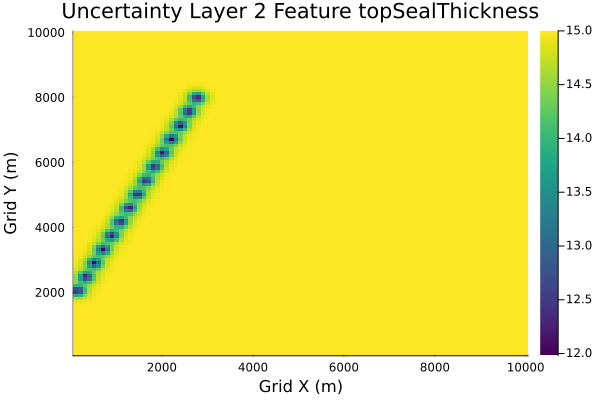

In [21]:
# Taking a seismic line action first
distr = POMDPs.observation(pomdp, all_actions[21], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[21])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

In [22]:
pomdp.rocktype_belief

5-element Vector{Categorical{Float64, Vector{Float64}}}:
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.3333333333333333, 0.3333333333333333, 0.3333333333333333])

In [23]:
distr = POMDPs.observation(pomdp, all_actions[2], pomdp.state);
pomdp.rocktype_belief

5-element Vector{Categorical{Float64, Vector{Float64}}}:
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[0.0, 0.0, 1.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])
 Categorical{Float64, Vector{Float64}}(support=Base.OneTo(3), p=[1.0, 0.0, 0.0])

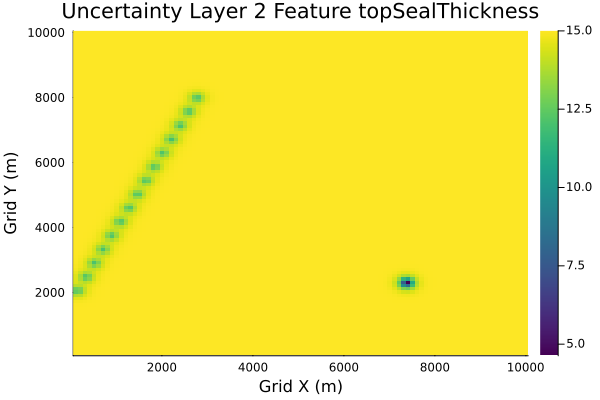

In [24]:
visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: 32.81319867946137


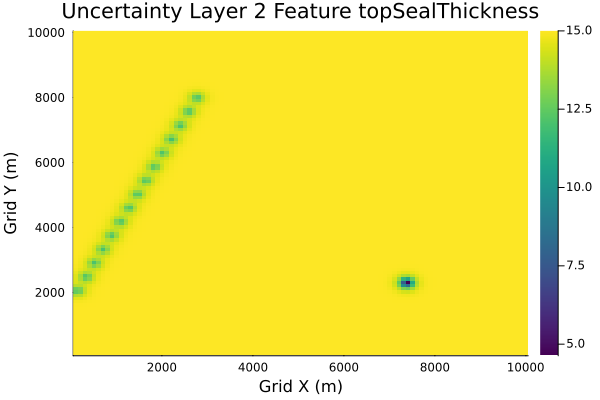

In [25]:
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[2])
println(typeof(distr), "\nReward: ", reward)

visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: -0.23345514395800748


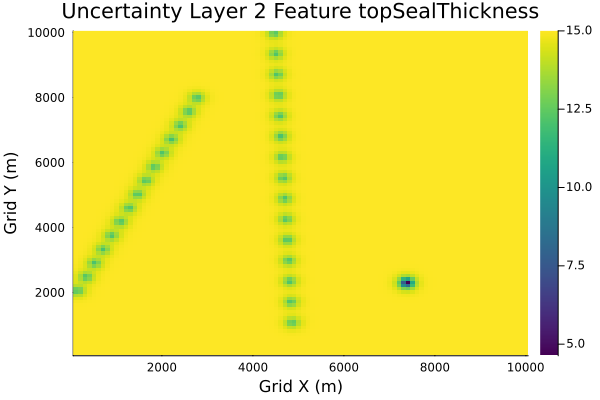

In [26]:
# Timing test for seismic line observation and reward function
distr = POMDPs.observation(pomdp, all_actions[19], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[19])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)

Distributions.ProductDistribution{2, 1, Vector{MixtureModel{Multivariate, Continuous, MvNormal, Categorical{Float64, Vector{Float64}}}}, Continuous, Float64}
Reward: 0.536769680149833


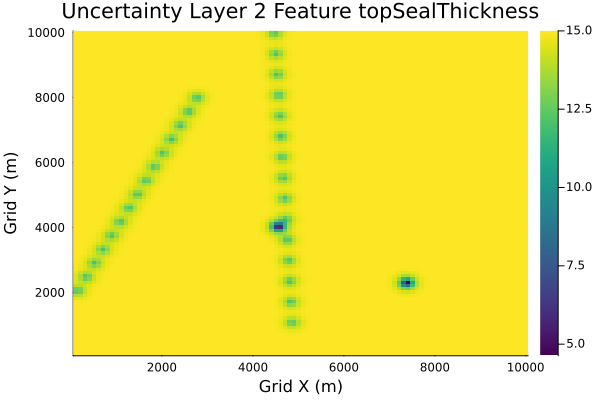

In [27]:
# Timing test for well log observation and reward function
distr = POMDPs.observation(pomdp, all_actions[1], pomdp.state)
reward = POMDPs.reward(pomdp, pomdp.state, all_actions[1])
println(typeof(distr), "\nReward: ", reward)
visualize_uncertainty(pomdp, 2, FEATURE)